<a href="https://colab.research.google.com/github/badrinarayanan02/Predictive-Analytics/blob/main/2348507_PAETE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Productivity Changes Using Regression and Tree-Based Models

Scenario Overview: You have been provided with a dataset detailing the impact of COVID-
19 on the work patterns of professionals across various sectors. The dataset contains 10,000
rows and 15 features, including attributes such as:

1) Increased Work Hours: Number of hours worked more than usual.

2) Work from Home: Binary indicator (1 = work from home, 0 = no work from home).

3) Productivity Changes: A numeric score representing how an individual productivity has changed (positive, neutral, or negative).

4) Stress Levels: A numeric rating of stress on a scale of 1 to 10.

Your task is to explore how the pandemic-driven changes in work patterns impact Productivity Changes using both traditional regression techniques and tree-based regression models like Decision Tree and Random Forest.

## Data Preprocessing and Exploration

Loading the Libraries

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

Loading the Dataset

In [86]:
data = pd.read_csv('/content/synthetic_covid_impact_on_work - synthetic_covid_impact_on_work.csv')
data.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
0,1,1,6.392394,2.684594,1,Low,0,0,1,1,1,0,1,Retail,1
1,1,1,9.171984,3.339225,1,Low,0,1,0,1,1,0,1,IT,1
2,1,0,10.612561,2.218333,0,Medium,0,0,0,0,0,0,0,Retail,1
3,1,1,5.546169,5.150566,0,Medium,0,0,0,1,0,0,0,Education,1
4,0,1,11.424615,3.121126,1,Medium,0,1,1,1,0,1,1,Education,1


In [87]:
data.shape

(10000, 15)

### Inference

There are 10,000 rows with 15 columns present in the dataset.

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Increased_Work_Hours           10000 non-null  int64  
 1   Work_From_Home                 10000 non-null  int64  
 2   Hours_Worked_Per_Day           10000 non-null  float64
 3   Meetings_Per_Day               10000 non-null  float64
 4   Productivity_Change            10000 non-null  int64  
 5   Stress_Level                   10000 non-null  object 
 6   Health_Issue                   10000 non-null  int64  
 7   Job_Security                   10000 non-null  int64  
 8   Childcare_Responsibilities     10000 non-null  int64  
 9   Commuting_Changes              10000 non-null  int64  
 10  Technology_Adaptation          10000 non-null  int64  
 11  Salary_Changes                 10000 non-null  int64  
 12  Team_Collaboration_Challenges  10000 non-null  

In [89]:
data.isnull().sum()

,0
Increased_Work_Hours,0
Work_From_Home,0
Hours_Worked_Per_Day,0
Meetings_Per_Day,0
Productivity_Change,0
Stress_Level,0
Health_Issue,0
Job_Security,0
Childcare_Responsibilities,0
Commuting_Changes,0


### Inference


There are no null values in this Covid19 dataset.

In [90]:
data.describe()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Affected_by_Covid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0
mean,0.676900,0.803300,8.006538,3.976717,0.50220,0.301100,0.404900,0.396700,0.50220,0.605100,0.194800,0.700600,1.0
std,0.467684,0.397523,1.978468,1.521594,0.50002,0.458759,0.490897,0.489237,0.50002,0.488854,0.396066,0.458018,0.0
min,0.000000,0.000000,0.287249,-2.698406,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,6.648484,2.924896,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
50%,1.000000,1.000000,8.010864,3.981344,1.00000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,1.0
75%,1.000000,1.000000,9.348860,5.024619,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,1.0
max,1.000000,1.000000,16.958168,9.591750,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0


Exploring unique values in the categorical columns

In [91]:
categorical_columns = ['Stress_Level', 'Sector']
print("\nUnique values in categorical columns")
for col in categorical_columns:
        print("\n")
        print(data[col].value_counts())


Unique values in categorical columns


Stress_Level
Medium    4956
High      3036
Low       2008
Name: count, dtype: int64


Sector
IT            2546
Healthcare    2498
Education     2484
Retail        2472
Name: count, dtype: int64


Correlation map for numerical columns

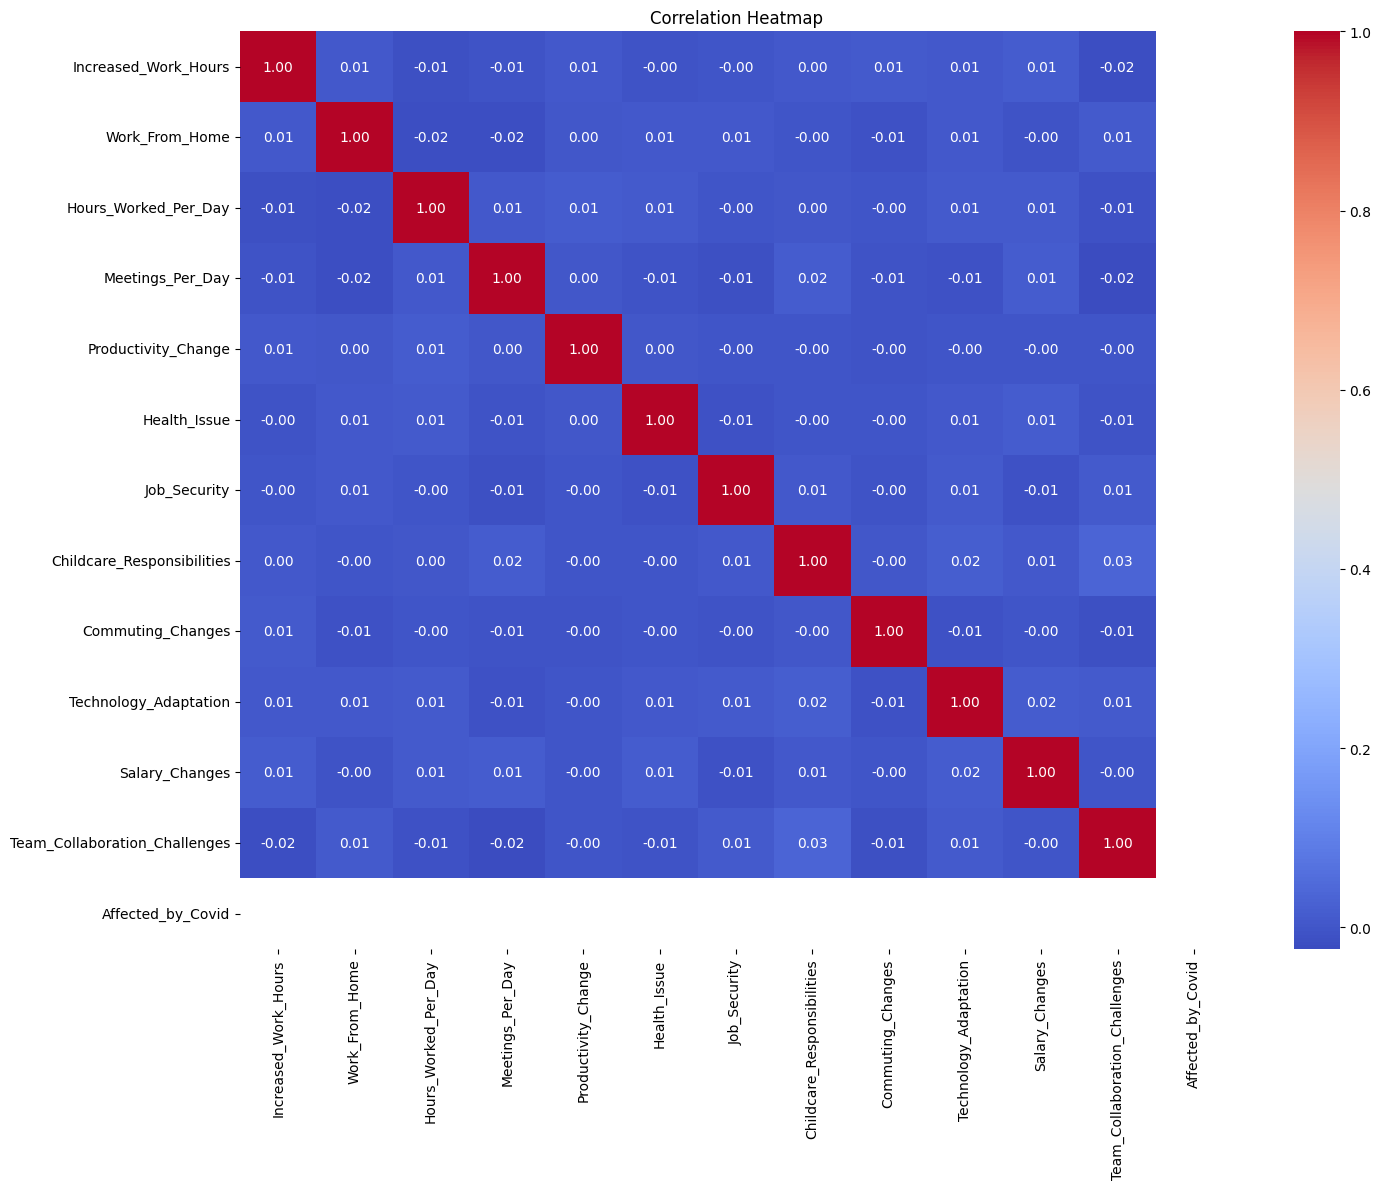

In [92]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 12))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Distribution of Productivity Change

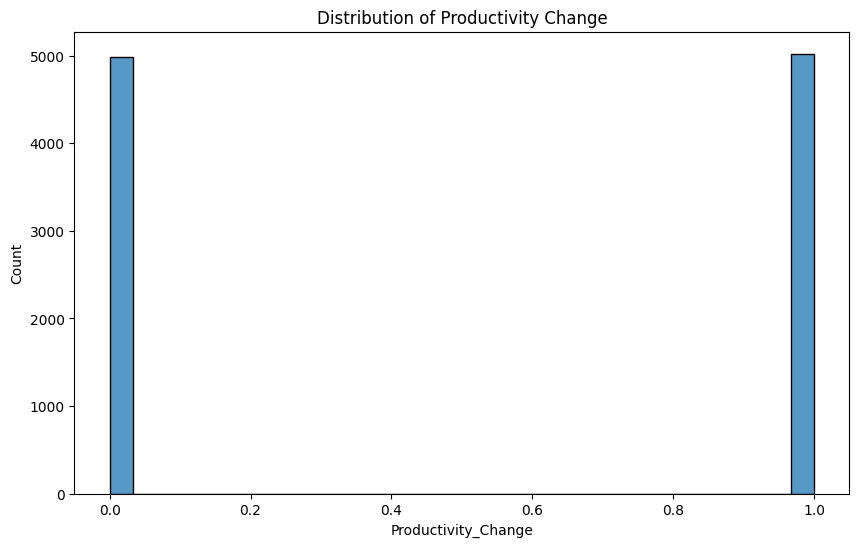

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Productivity_Change', bins=30)
plt.title('Distribution of Productivity Change')
plt.show()

Box Plot for Key Numerical Variables

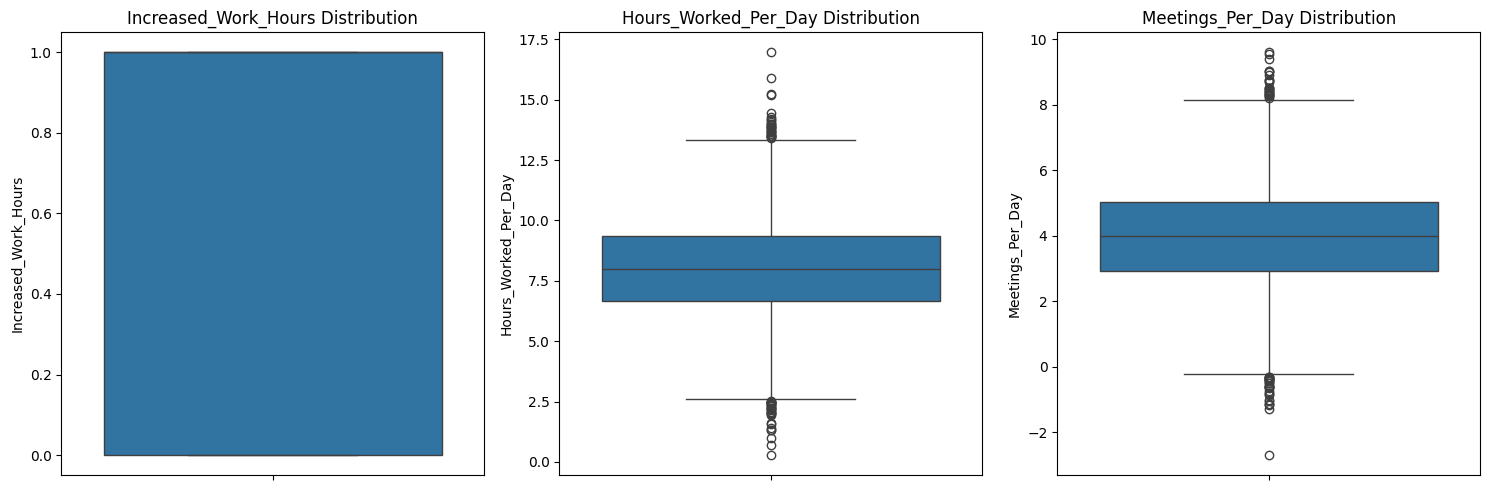

In [94]:
numerical_features = ['Increased_Work_Hours', 'Hours_Worked_Per_Day', 'Meetings_Per_Day']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
      plt.subplot(1, 3, i)
      sns.boxplot(data=data, y=feature)
      plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()


### Inference

**Distribution of Work Patterns**


Hours Worked Per Day shows significant variation, ranging from approximately 2.5 to 17.5 hours, with most people working between 7-9 hours.

Meetings Per Day averages around 4 meetings, with some outliers having up to 10 meetings daily.

The increased work hours distribution appears to be relatively uniform across the dataset.


**Stress Levels**


Medium stress level is most common (4,956 employees)

High stress reported by 3,036 employees

Low stress reported by 2,008 employees

This indicates that about half of the workforce is experiencing medium stress.


**Sector Distribution**


IT: 2,546 employees

Healthcare: 2,498 employees

Education: 2,484 employees

Retail: 2,472 employees


Data is evenly distributed across each sectors.


**Correlation Analysis**


Most variables show very weak correlations with each other (correlation coefficients close to 0). There are no strong correlations between Productivity_Change and other variables.

**Features with Most Variability**

Hours_Worked_Per_Day shows the highest variability, with a wide range from 2.5 to 17.5 hours and multiple outliers.

Meetings_Per_Day also shows considerable variation, ranging from 0 to 10 meetings.

Stress_Level shows meaningful variation across three categories, with a skew towards medium and high levels.


Data Preparation

In [95]:
le = LabelEncoder()

data['Stress_Level'] = le.fit_transform(data['Stress_Level'])
data

X = data.drop(['Productivity_Change','Sector','Health_Issue','Childcare_Responsibilities','Job_Security','Commuting_Changes','Technology_Adaptation','Team_Collaboration_Challenges','Salary_Changes','Affected_by_Covid','Hours_Worked_Per_Day', 'Meetings_Per_Day'],axis=1)
y = data['Productivity_Change']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False))
    ])


preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Data Splitting

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

numeric_features_list = list(numeric_features)
categorical_features_list = []
for feature in categorical_features:
        unique_values = data[feature].unique()
        categorical_features_list.extend([f"{feature}_{val}" for val in unique_values[1:]])

feature_names = numeric_features_list + categorical_features_list

feature_names

['Increased_Work_Hours', 'Work_From_Home', 'Stress_Level']

# Linear Regression


Linear Regression Results
-------------------------
R² Score: -0.0024
RMSE: 0.5005

Important Features
                Feature  Coefficient
0  Increased_Work_Hours     0.012447
1        Work_From_Home     0.005396
2          Stress_Level     0.004607


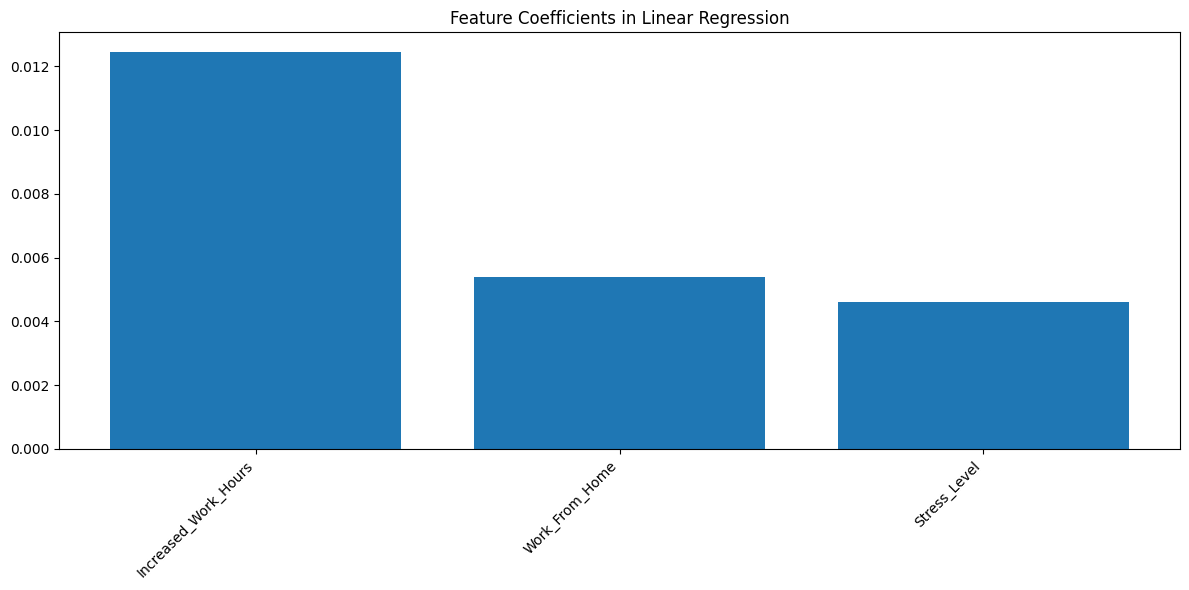

In [97]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("\nLinear Regression Results")
print("-------------------------")
print(f"R² Score: {r2_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")

importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': lr_model.coef_
    })
importance_df = importance_df.sort_values('Coefficient', key=abs, ascending=False)

print("\nImportant Features")
print(importance_df.head(10))

plt.figure(figsize=(12, 6))
plt.bar(range(len(importance_df.head(3))), importance_df['Coefficient'].head(10))
plt.xticks(range(len(importance_df.head(3))), importance_df['Feature'].head(10), rotation=45, ha='right')
plt.title('Feature Coefficients in Linear Regression')
plt.tight_layout()
plt.show()

### Inference

The R² score of -0.0024 indicates very poor model performance.

R² ranges from 0 to 1, with 1 indicating perfect prediction
A negative R² score means the model performs worse than a horizontal line (mean). The value is close to zero (-0.0024) suggests that there's essentially no linear relationship between these variables and the target variable.

The RMSE of 0.5005 also suggests significant prediction errors

All features have positive coefficients, meaning they all have a positive relationship with the target variable. However, the negative R² score indicates that these variables are not good predictors of the target variable. The relationship between these variables and the target is not linear

# Decision Tree Regression


Decision Tree Results:
------------------------

Max Depth: 10
R² Score: -0.0019
RMSE: 0.5003

 Important Features (Decision Tree):
                Feature  Importance
2          Stress_Level    0.529926
1        Work_From_Home    0.311975
0  Increased_Work_Hours    0.158099


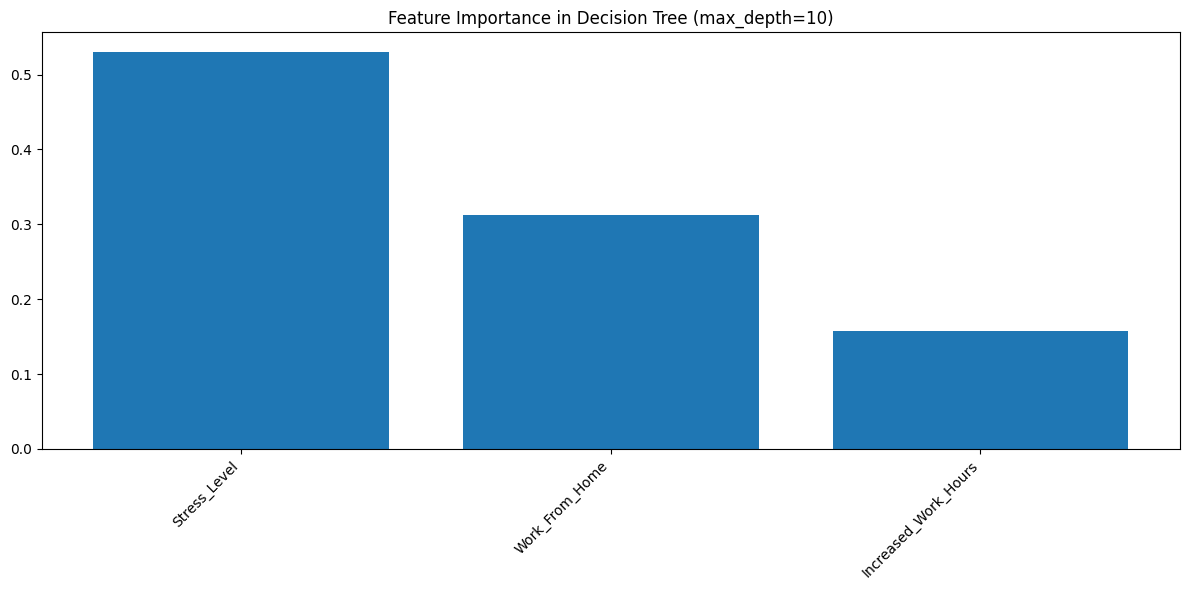

In [102]:
max_depths = [3, 5, 7, 10]
results = []

for depth in max_depths:
        dt_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
        dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

results.append({
            'max_depth': depth,
            'r2': r2_dt,
            'rmse': rmse_dt,
            'model': dt_model
        })

best_model = max(results, key=lambda x: x['r2'])

print("\nDecision Tree Results:")
print("------------------------")
for result in results:
        print(f"\nMax Depth: {result['max_depth']}")
        print(f"R² Score: {result['r2']:.4f}")
        print(f"RMSE: {result['rmse']:.4f}")

importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': best_model['model'].feature_importances_
    })
importance_df = importance_df.sort_values('Importance', ascending=False)

print("\n Important Features (Decision Tree):")
print(importance_df.head(10))

plt.figure(figsize=(12, 6))
plt.bar(range(len(importance_df.head(10))), importance_df['Importance'].head(10))
plt.xticks(range(len(importance_df.head(10))), importance_df['Feature'].head(10), rotation=45, ha='right')
plt.title(f'Feature Importance in Decision Tree (max_depth={best_model["max_depth"]})')
plt.tight_layout()
plt.show()

### Inference

Decision Tree: R² = -0.0019, RMSE = 0.5003

The performance is very similar, with both models performing poorly

The Decision Tree has a slightly better less negative, R² score (-0.0019 vs -0.0024). The RMSE values are nearly identical 0.5003 vs 0.5005 for both Linear Regression and Decision Tree Regression. Neither model is able to capture meaningful patterns in the data.

**Feature Importance**

Decision Tree emphasizes Stress_Level (0.53) as the most important feature. Linear Regression had Increased_Work_Hours (0.012) as the strongest coefficient. Both models show similarly poor performance.

The relationship between variables might be more complex than either model can capture.

# Model Comparison and Conclusion


Model Comparison:
-------------------
               Model  R² Score      RMSE
0  Linear Regression -0.002438  0.500465
1      Decision Tree -0.001925  0.500337


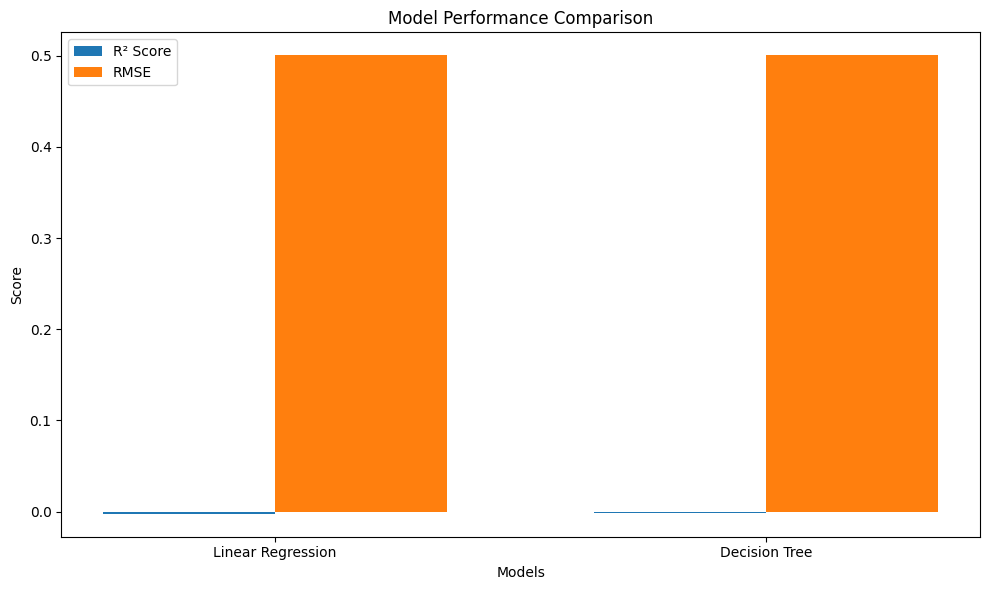

In [108]:
models = ['Linear Regression', 'Decision Tree']
r2_scores = [r2_lr, r2_dt]
rmse_scores = [rmse_lr, rmse_dt]

comparison_df = pd.DataFrame({
        'Model': models,
        'R² Score': r2_scores,
        'RMSE': rmse_scores
    })

print("\nModel Comparison:")
print("-------------------")
print(comparison_df)

plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, r2_scores, width, label='R² Score')
plt.bar(x + width/2, rmse_scores, width, label='RMSE')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()

### Inference

Made a comparison between both the models. The results are almost similar for both the models.

# Conclusion

The relationship between variables might be more complex than either model can capture. Both the models are giving low performance. This shows that the data has non linearity. We need to try another models to come to a conclusion. Thus decision tree regressor and linear regression both are examined for this Covid 19 dataset.